In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import json
from scipy.spatial.transform import Rotation as R

In [2]:
folder_path = './solo/sequence.0'
with open(f'{folder_path}/step0.frame_data.json') as json_file:
    data = json.load(json_file)

In [3]:
captures = data['captures']
def get_location(captures):
    # coeff = np.array([-0.00389254, 0.49512566, 0.13212298])

    def _find(l, s):
        for elem in l:
            if elem['id'] == s or elem['id'] == f'{s}_0':
                return elem['values'][0]
    
    def _get_bbox(view):
        '''
            For each view, extract the 2D bounding box and
        '''
        bbox_3d, bbox_2d = _find(view['annotations'], 'bounding box 3D'), _find(view['annotations'], 'bounding box')
        
        # refine 3D location of the object
        euler = R.from_quat(bbox_3d.get('rotation')).as_matrix()
        obj_location = view.get('position') + np.dot(bbox_3d['translation'], euler)  # - bbox_3d['size']*np.array([-0.00389254, 0.49512566, 0.13212298])

        # pre-process 2D bbox
        bbox = {
            'center': np.array(bbox_2d['origin']) + np.array(bbox_2d['dimension'])/2,
            'size': np.array(bbox_2d['dimension'])/2,
        }

        return obj_location, bbox

    bboxes, cameras = [], []
    for view in captures:  # per view
        obj_location, bbox_2d = _get_bbox(view)

        bboxes.append(bbox_2d)
        cameras.append({
            'filename': view['filename'],
            'position': view['position'],
            'rotation': view['rotation'],
        })

    return {
        '3D_location': obj_location,
        'bboxes': bboxes,
        'cameras': cameras,
    }

output = get_location(captures)

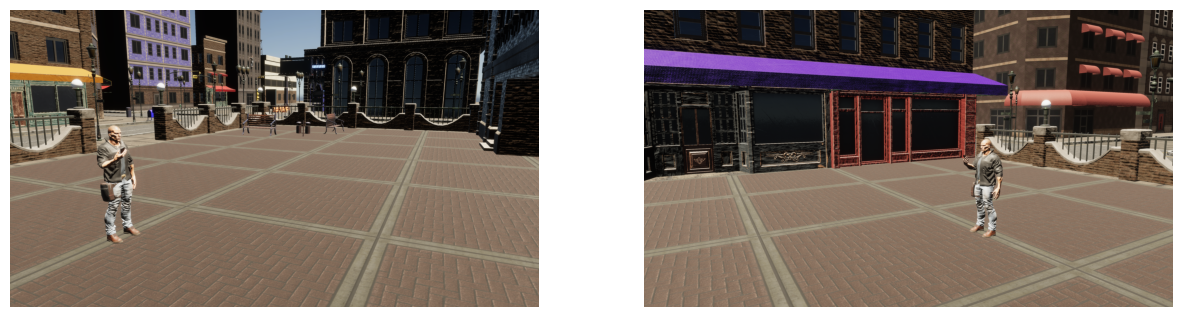

In [4]:
n_view = len(output['bboxes'])
fig, ax = plt.subplots(1, 2, figsize=(15, 15*n_view))
for i in range(n_view):
    bbox, camera = output.get('bboxes')[i], output.get('cameras')[i]
    ax[i].imshow(mpimg.imread(f'{folder_path}/{camera["filename"]}'))
    # plt.imshow(mpimg.imread(f'{folder_path}/{camera["filename"]}'))
    # plt.axis('off')
    # plt.show()
    # ax[i].add_patch(
    #     patches.Rectangle(
    #         bbox['center'] - np.array([bbox['size'][0], bbox['size'][1]]),
    #         2*bbox['size'][0], 2*bbox['size'][1],
    #         linewidth=1, edgecolor='r', facecolor='none'
    #     )
    # )
    ax[i].axis('off')

plt.show()

{'center': array([ 789., 1274.]), 'size': array([159., 429.])}


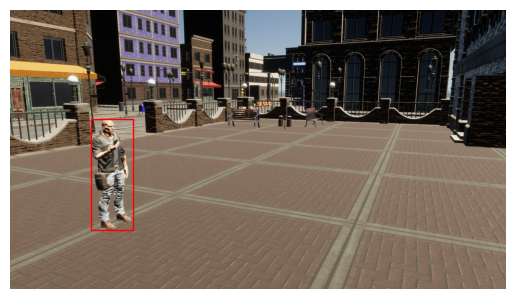

{'center': array([2462. , 1301.5]), 'size': array([144. , 358.5])}


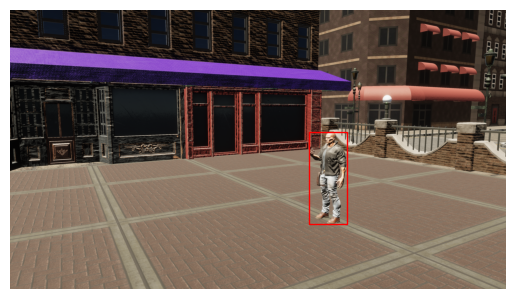

In [6]:
n_view = len(output['bboxes'])
# fig, ax = plt.subplots(1, 2, figsize=(15, 15*n_view))
for i in range(n_view):
    fig, ax = plt.subplots()
    bbox, camera = output.get('bboxes')[i], output.get('cameras')[i]
    print(bbox)
    # ax[i].imshow(mpimg.imread(f'./solo/sequence.0/{camera["filename"]}'))
    plt.imshow(mpimg.imread(f'./solo/sequence.0/{camera["filename"]}'))
    ax.add_patch(
        patches.Rectangle(
            bbox['center'] - np.array([bbox['size'][0], bbox['size'][1]]),
            2*bbox['size'][0], 2*bbox['size'][1],
            linewidth=1, edgecolor='r', facecolor='none'
        )
    )
    plt.axis('off')
    plt.show()
    # ax[i].axis('off')

# plt.show()

In [5]:
bbox

{'center': array([2462. , 1301.5]), 'size': array([144. , 358.5])}